In [133]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fim import apriori

In [134]:
df= pd.read_csv("Dati_Pattern.csv")

In [135]:
df.head()

,Attrition,BusinessTravel,Education,EducationField,Gender,JobRole,MaritalStatus,OverTime,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,Satisfaction-Class,ChangeCompanyRate-Class,YearsInCurrentRole-Class,TotalWorkingYears-Class,PercentSalaryHike-Class,DistanceFromHome-Class,Age-Class,MonthlyIncome-Class
0,No_Attrition,Travel_Rarely,Master,Medical,Male,Research Director,Single,No_OverTime,Tre_Performance,LivelloZero,Due_Training,Satisfaction[12; 14],ChangeCompanyRate[8.03; 9.25],YearsInCurrentRole[7; 10],TotalWorkingYears[19; 31],PercentSalaryHike[14; 18],DistanceFromHome[7; 11],Age[52.0; 60.0],MonthlyIncome[6272.0; 9419.0]
1,No_Attrition,Travel_Rarely,Below College,Life Sciences,Male,Manager,Divorced,Si_OverTime,Tre_Performance,LivelloUno,Tre_Training,Satisfaction[12; 14],ChangeCompanyRate[0.03; 2.2],YearsInCurrentRole[7; 10],TotalWorkingYears[19; 31],PercentSalaryHike[14; 18],DistanceFromHome[1; 6],Age[33.0; 43.0],MonthlyIncome[1009.0; 6244.0]
2,No_Attrition,Travel_Frequently,Bachelor,Life Sciences,NaN,Sales Executive,Divorced,Si_OverTime,Tre_Performance,LivelloUno,Quattro_Training,Satisfaction[15; 16],ChangeCompanyRate[0.03; 2.2],YearsInCurrentRole[3; 6],TotalWorkingYears[0; 10],PercentSalaryHike[21; 25],DistanceFromHome[12; 18],NaN,MonthlyIncome[1009.0; 6244.0]
3,No_Attrition,Travel_Rarely,Master,Technical Degree,Male,Research Scientist,Single,No_OverTime,Tre_Performance,LivelloZero,Uno_Training,Satisfaction[12; 14],ChangeCompanyRate[0.03; 2.2],YearsInCurrentRole[7; 10],TotalWorkingYears[11; 18],PercentSalaryHike[14; 18],DistanceFromHome[1; 6],Age[33.0; 43.0],MonthlyIncome[1009.0; 6244.0]
4,No_Attrition,Travel_Rarely,College,Life Sciences,Female,Laboratory Technician,Single,No_OverTime,Tre_Performance,LivelloZero,NaN,Satisfaction[15; 16],ChangeCompanyRate[0.03; 2.2],YearsInCurrentRole[0; 2],TotalWorkingYears[0; 10],PercentSalaryHike[11; 13],DistanceFromHome[7; 11],NaN,MonthlyIncome[6272.0; 9419.0]


In [136]:
baskets = df.values.tolist()

In [137]:
baskets[0]

['No_Attrition',
 'Travel_Rarely',
 'Master',
 'Medical',
 'Male',
 'Research Director',
 'Single',
 'No_OverTime',
 'Tre_Performance',
 'LivelloZero',
 'Due_Training',
 'Satisfaction[12; 14]',
 'ChangeCompanyRate[8.03; 9.25]',
 'YearsInCurrentRole[7; 10]',
 'TotalWorkingYears[19; 31]',
 'PercentSalaryHike[14; 18]',
 'DistanceFromHome[7; 11]',
 'Age[52.0; 60.0]',
 'MonthlyIncome[6272.0; 9419.0]']

In [6]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

# Frequent itemsets

In [7]:
itemsets_freq= apriori(baskets, target='a', supp=20, zmin=2, report='as')

In [8]:
itemsets_freq[0:10]

[(('DistanceFromHome[7; 11]', 'No_Attrition'), 246, 0.20918367346938777),
 (('Age[25.0; 32.0]', 'No_Attrition'), 236, 0.20068027210884354),
 (('Master', 'No_Attrition'), 266, 0.2261904761904762),
 (('Satisfaction[15; 16]', 'Tre_Performance'), 247, 0.2100340136054422),
 (('Satisfaction[15; 16]', 'No_Attrition'), 281, 0.2389455782312925),
 (('YearsInCurrentRole[7; 10]', 'No_OverTime'), 238, 0.20238095238095238),
 (('YearsInCurrentRole[7; 10]', 'Tre_Performance'), 243, 0.2066326530612245),
 (('YearsInCurrentRole[7; 10]', 'No_Attrition'), 291, 0.24744897959183673),
 (('Tre_Training', 'No_OverTime'), 245, 0.20833333333333334),
 (('Tre_Training', 'Tre_Performance'), 239, 0.2032312925170068)]

In [9]:
len(itemsets_freq)

414

In [10]:
itemsets_freq.sort(key=lambda x: x[1],reverse=True)

In [11]:
itemsets_freq[0:20]

[(('No_OverTime', 'No_Attrition'), 749, 0.6369047619047619),
 (('Tre_Performance', 'No_Attrition'), 735, 0.625),
 (('Travel_Rarely', 'No_Attrition'), 648, 0.5510204081632653),
 (('No_OverTime', 'Tre_Performance'), 630, 0.5357142857142857),
 (('TotalWorkingYears[0; 10]', 'No_Attrition'), 601, 0.5110544217687075),
 (('ChangeCompanyRate[0.03; 2.2]', 'No_Attrition'), 592, 0.5034013605442177),
 (('Travel_Rarely', 'Tre_Performance'), 567, 0.48214285714285715),
 (('No_OverTime', 'Tre_Performance', 'No_Attrition'),
  563,
  0.47874149659863946),
 (('TotalWorkingYears[0; 10]', 'Tre_Performance'), 559, 0.47534013605442177),
 (('Male', 'No_Attrition'), 555, 0.4719387755102041),
 ((nan, 'No_Attrition'), 549, 0.46683673469387754),
 (('Travel_Rarely', 'No_OverTime'), 547, 0.4651360544217687),
 (('TotalWorkingYears[0; 10]', 'No_OverTime'), 540, 0.45918367346938777),
 (('ChangeCompanyRate[0.03; 2.2]', 'Tre_Performance'),
  527,
  0.4481292517006803),
 (('MonthlyIncome[1009.0; 6244.0]', 'No_Attrition')

In [12]:
itemsets_freq= apriori(baskets, target='a', supp=20, zmin=4, report='as')
itemsets_freq.sort(key=lambda x: x[1],reverse=True)
itemsets_freq[0:20]

[(('Travel_Rarely', 'No_OverTime', 'Tre_Performance', 'No_Attrition'),
  369,
  0.3137755102040816),
 (('TotalWorkingYears[0; 10]',
   'No_OverTime',
   'Tre_Performance',
   'No_Attrition'),
  350,
  0.2976190476190476),
 (('ChangeCompanyRate[0.03; 2.2]',
   'No_OverTime',
   'Tre_Performance',
   'No_Attrition'),
  333,
  0.28316326530612246),
 (('ChangeCompanyRate[0.03; 2.2]',
   'TotalWorkingYears[0; 10]',
   'No_OverTime',
   'No_Attrition'),
  319,
  0.27125850340136054),
 (('Male', 'No_OverTime', 'Tre_Performance', 'No_Attrition'),
  313,
  0.266156462585034),
 (('ChangeCompanyRate[0.03; 2.2]',
   'TotalWorkingYears[0; 10]',
   'Tre_Performance',
   'No_Attrition'),
  308,
  0.2619047619047619),
 (('TotalWorkingYears[0; 10]', 'Travel_Rarely', 'No_OverTime', 'No_Attrition'),
  306,
  0.2602040816326531),
 (('TotalWorkingYears[0; 10]',
   'Travel_Rarely',
   'Tre_Performance',
   'No_Attrition'),
  300,
  0.25510204081632654),
 (('ChangeCompanyRate[0.03; 2.2]',
   'Travel_Rarely',

In [13]:
df['OverTime'].value_counts()
#89 (No_OverTime, Si_Attrition)
#103 (Si_OverTime, Si_Attrition)

No_OverTime    838
Si_OverTime    338
Name: OverTime, dtype: int64

In [14]:
df['PerformanceRating'].value_counts()

Tre_Performance        880
Quattro_Performance    158
Name: PerformanceRating, dtype: int64

In [15]:
df['Attrition'].value_counts()

No_Attrition    984
Si_Attrition    192
Name: Attrition, dtype: int64

In [16]:
df['ChangeCompanyRate-Class'].value_counts()

ChangeCompanyRate[0.03; 2.2]     705
ChangeCompanyRate[3.03; 5.2]     276
ChangeCompanyRate[6.03; 7.25]    115
ChangeCompanyRate[8.03; 9.25]     80
Name: ChangeCompanyRate-Class, dtype: int64

In [17]:
df['TotalWorkingYears-Class'].value_counts()

TotalWorkingYears[0; 10]     748
TotalWorkingYears[11; 18]    238
TotalWorkingYears[19; 31]    159
TotalWorkingYears[32; 40]     31
Name: TotalWorkingYears-Class, dtype: int64

In [18]:
df['MaritalStatus'].value_counts()

Married     542
Single      383
Divorced    251
Name: MaritalStatus, dtype: int64

In [19]:
n_itemsets=[]
for support in range(10,100,5):
    n_itemsets.append(len(apriori(baskets, target='a', supp=support, zmin=2, report='as')))

n_itemsets

#support in range (10,100)
#zmin=2

[3300, 1027, 414, 194, 93, 45, 26, 13, 6, 3, 2, 0, 0, 0, 0, 0, 0, 0]

In [20]:
n_itemsets=[]
for support in range(10,100,5):
    n_itemsets.append(len(apriori(baskets, target='a', supp=support, zmin=3, report='as')))

n_itemsets

#support in range (10,100)
#zmin=3

[2812, 739, 237, 86, 29, 9, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [21]:
n_itemsets=[]
for support in range(10,100,5):
    n_itemsets.append(len(apriori(baskets, target='a', supp=support, zmin=4, report='as')))

n_itemsets

#support in range (10,100)
#zmin=4

[1481, 243, 46, 10, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Maximal itemsets

In [22]:
itemsets_max= apriori(baskets, target='m', supp=10, zmin=2, report='as')

In [23]:
itemsets_max[0:10]

[(('Age[44.0; 51.0]', 'Tre_Performance'), 120, 0.10204081632653061),
 (('Age[44.0; 51.0]', 'No_Attrition'), 123, 0.10459183673469388),
 (('Quattro_Performance', 'No_Attrition'), 130, 0.11054421768707483),
 (('TotalWorkingYears[19; 31]', 'Travel_Rarely'), 119, 0.10119047619047619),
 (('TotalWorkingYears[19; 31]', 'Tre_Performance'), 119, 0.10119047619047619),
 (('TotalWorkingYears[19; 31]', 'No_Attrition'), 147, 0.125),
 (('Si_Attrition', 'LivelloZero'), 127, 0.10799319727891156),
 (('Si_Attrition', 'YearsInCurrentRole[0; 2]'), 126, 0.10714285714285714),
 (('Si_Attrition', 'TotalWorkingYears[0; 10]'), 147, 0.125),
 (('Si_Attrition', 'Tre_Performance'), 145, 0.12329931972789115)]

In [24]:
len(itemsets_max)

1357

In [25]:
itemsets_max.sort(key=lambda x: x[1],reverse=True)

In [26]:
itemsets_max[0:10]

[(('Satisfaction[12; 14]',
   'Travel_Rarely',
   'No_OverTime',
   'Tre_Performance',
   'No_Attrition'),
  184,
  0.1564625850340136),
 (('Married',
   'Travel_Rarely',
   'No_OverTime',
   'Tre_Performance',
   'No_Attrition'),
  181,
  0.15391156462585034),
 (('PercentSalaryHike[11; 13]', nan, 'No_OverTime', 'No_Attrition'),
  177,
  0.15051020408163265),
 (('Single', 'LivelloZero', 'No_OverTime', 'Tre_Performance', 'No_Attrition'),
  175,
  0.1488095238095238),
 ((nan,
   'ChangeCompanyRate[0.03; 2.2]',
   'TotalWorkingYears[0; 10]',
   'No_OverTime',
   'No_Attrition'),
  174,
  0.14795918367346939),
 (('Si_OverTime', 'Tre_Performance', 'No_Attrition'),
  172,
  0.14625850340136054),
 (('LivelloUno', 'Married', 'No_OverTime', 'Tre_Performance', 'No_Attrition'),
  172,
  0.14625850340136054),
 (('Life Sciences', nan, 'No_OverTime', 'No_Attrition'),
  172,
  0.14625850340136054),
 (('Satisfaction[12; 14]',
   'TotalWorkingYears[0; 10]',
   'No_OverTime',
   'Tre_Performance',
   'N

In [27]:
n_itemsets=[]
for support in range(10,100,5):
    n_itemsets.append(len(apriori(baskets, target='m', supp=support, zmin=2, report='as')))

n_itemsets

#support in range (10,100)
#zmin=2

[1357, 466, 205, 105, 56, 29, 18, 10, 6, 3, 2, 0, 0, 0, 0, 0, 0, 0]

In [28]:
n_itemsets=[]
for support in range(10,100,5):
    n_itemsets.append(len(apriori(baskets, target='m', supp=support, zmin=3, report='as')))

n_itemsets

#support in range (10,100)
#zmin=3

[1277, 394, 154, 62, 25, 9, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [29]:
n_itemsets=[]
for support in range(10,100,5):
    n_itemsets.append(len(apriori(baskets, target='m', supp=support, zmin=4, report='as')))

n_itemsets

#support in range (10,100)
#zmin=4

[871, 190, 46, 10, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Closed itemsets

In [30]:
itemsets_closed= apriori(baskets, target='c', supp=10, zmin=2, report='as')

In [31]:
itemsets_closed[0:10]

[(('Age[44.0; 51.0]', 'Tre_Performance'), 120, 0.10204081632653061),
 (('Age[44.0; 51.0]', 'No_Attrition'), 123, 0.10459183673469388),
 (('Quattro_Performance', 'No_Attrition'), 130, 0.11054421768707483),
 (('TotalWorkingYears[19; 31]', 'Travel_Rarely'), 119, 0.10119047619047619),
 (('TotalWorkingYears[19; 31]', 'Tre_Performance'), 119, 0.10119047619047619),
 (('TotalWorkingYears[19; 31]', 'No_Attrition'), 147, 0.125),
 (('Si_Attrition', 'LivelloZero'), 127, 0.10799319727891156),
 (('Si_Attrition', 'YearsInCurrentRole[0; 2]'), 126, 0.10714285714285714),
 (('Si_Attrition', 'TotalWorkingYears[0; 10]'), 147, 0.125),
 (('Si_Attrition', 'Tre_Performance'), 145, 0.12329931972789115)]

In [32]:
len(itemsets_closed)

3209

In [33]:
itemsets_closed.sort(key=lambda x: x[1],reverse=True)

In [34]:
itemsets_closed[0:10]

[(('No_OverTime', 'No_Attrition'), 749, 0.6369047619047619),
 (('Tre_Performance', 'No_Attrition'), 735, 0.625),
 (('Travel_Rarely', 'No_Attrition'), 648, 0.5510204081632653),
 (('No_OverTime', 'Tre_Performance'), 630, 0.5357142857142857),
 (('TotalWorkingYears[0; 10]', 'No_Attrition'), 601, 0.5110544217687075),
 (('ChangeCompanyRate[0.03; 2.2]', 'No_Attrition'), 592, 0.5034013605442177),
 (('Travel_Rarely', 'Tre_Performance'), 567, 0.48214285714285715),
 (('No_OverTime', 'Tre_Performance', 'No_Attrition'),
  563,
  0.47874149659863946),
 (('TotalWorkingYears[0; 10]', 'Tre_Performance'), 559, 0.47534013605442177),
 (('Male', 'No_Attrition'), 555, 0.4719387755102041)]

In [35]:
n_itemsets=[]
for support in range(10,100,5):
    n_itemsets.append(len(apriori(baskets, target='c', supp=support, zmin=2, report='as')))

n_itemsets

#support in range (10,100)
#zmin=2

[3209, 1007, 409, 194, 93, 45, 26, 13, 6, 3, 2, 0, 0, 0, 0, 0, 0, 0]

In [36]:
n_itemsets=[]
for support in range(10,100,5):
    n_itemsets.append(len(apriori(baskets, target='c', supp=support, zmin=3, report='as')))

n_itemsets

#support in range (10,100)
#zmin=3

[2740, 730, 237, 86, 29, 9, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [37]:
n_itemsets=[]
for support in range(10,100,5):
    n_itemsets.append(len(apriori(baskets, target='c', supp=support, zmin=4, report='as')))

n_itemsets

#support in range (10,100)
#zmin=4

[1460, 243, 46, 10, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Association rules

In [40]:
rules = apriori(baskets, supp=10, zmin=3, target='r', conf=60, 
                report='ascl') 

In [41]:
print('Number of rule:', len(rules))

Number of rule: 13932


In [42]:
rules.sort(key=lambda x: x[4],reverse=True)

In [43]:
rules[0:5]

[('LivelloZero',
  ('Medical', 'Single'),
  118,
  0.10034013605442177,
  1.0,
  2.2879377431906613),
 ('LivelloZero',
  ('Single', 'Age[33.0; 43.0]'),
  130,
  0.11054421768707483,
  1.0,
  2.2879377431906613),
 ('LivelloZero',
  ('Single', 'PercentSalaryHike[14; 18]'),
  150,
  0.12755102040816327,
  1.0,
  2.2879377431906613),
 ('LivelloZero',
  ('Single', 'Female'),
  137,
  0.11649659863945579,
  1.0,
  2.2879377431906613),
 ('LivelloZero',
  ('Single', 'Bachelor', 'No_OverTime'),
  119,
  0.10119047619047619,
  1.0,
  2.2879377431906613)]

In [44]:
rules_conf=[rule[4] for rule in rules ]
rules_lift=[rule[5] for rule in rules ]

rules_highlift=[]
for rule in rules:
    if(rule[5]>1.9):
        rules_highlift.append(rule[5])

Text(0, 0.5, 'Num rules')

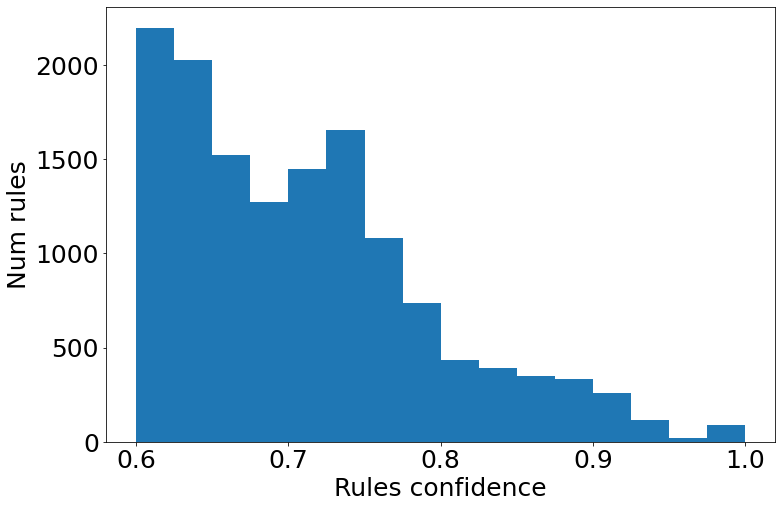

In [45]:
plt.rc('font', size=25)          # controls default text sizes
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
plt.rc('legend', fontsize=25)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title
plt.figure(figsize=(12, 8))
plt.hist(rules_conf, bins=np.arange(0.60,1.01,0.025))
plt.xlabel('Rules confidence')
plt.ylabel('Num rules')

Text(0, 0.5, 'Num rules')

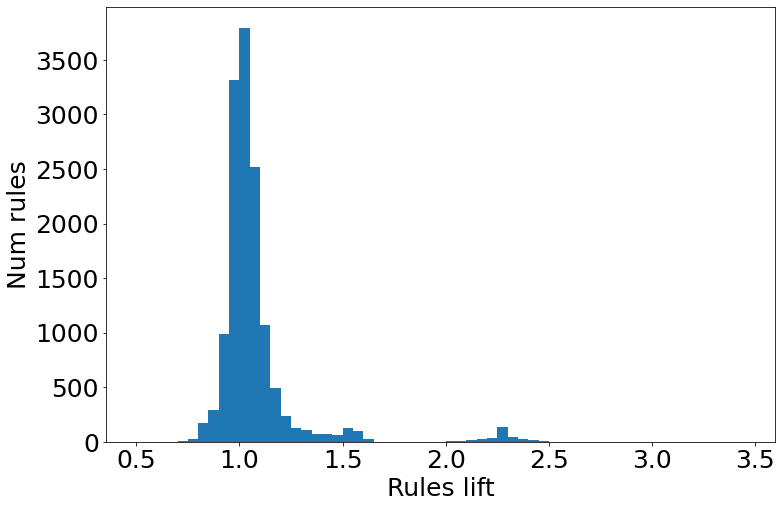

In [47]:
plt.rc('font', size=25)          # controls default text sizes
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
plt.rc('legend', fontsize=25)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title
plt.figure(figsize=(12, 8))
plt.hist(rules_lift, bins=np.arange(0.5,3.5,0.05))
plt.xlabel('Rules lift')
plt.ylabel('Num rules')

In [49]:
n_rules=[]
for confidence in range(60,101,5):
    n_rules.append(len(apriori(baskets, target='r', supp=10, zmin=3, conf=confidence, 
                               report='ascl')))


conf= np.arange(60,101,5)

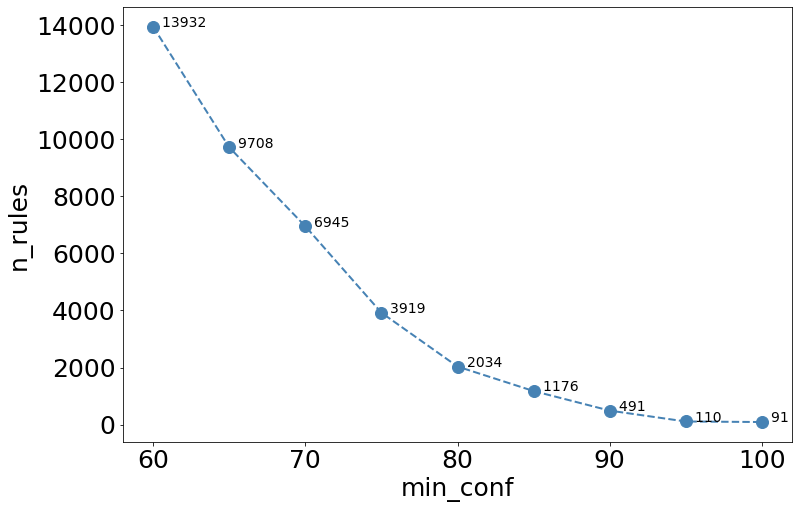

In [50]:
plt.rc('font', size=25)          # controls default text sizes
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
plt.rc('legend', fontsize=25)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title
plt.figure(figsize=(12, 8))
plt.plot(conf, n_rules, color='steelblue', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.xlabel('min_conf')
plt.ylabel('n_rules')
for a,b in zip(conf, n_rules): 
    plt.text(a, b, '  '+str(b), fontsize=14)
plt.show()

In [57]:
rules = apriori(baskets, supp=10, zmin=3, target='r', conf=80, 
                report='ascl') 

In [58]:
len(rules)

2034

In [59]:
rules_conseq=[rule[0] for rule in rules]
set(rules_conseq)

{'ChangeCompanyRate[0.03; 2.2]',
 'LivelloZero',
 'No_Attrition',
 'No_OverTime',
 'Single',
 'TotalWorkingYears[0; 10]',
 'Tre_Performance'}

In [60]:
rules_company=[]
for rule in rules:
    if (rule[0]=='ChangeCompanyRate[0.03; 2.2]'):
        rules_company.append(rule)
        
rules_company.sort(key=lambda x: x[5],reverse=True)
rules_company[0]

('ChangeCompanyRate[0.03; 2.2]',
 ('YearsInCurrentRole[7; 10]', 'TotalWorkingYears[0; 10]'),
 122,
 0.10374149659863946,
 0.8531468531468531,
 1.423121559291772)

In [67]:
rules_livello=[]
for rule in rules:
    if (rule[0]=='LivelloZero'):
        rules_livello.append(rule)
        
rules_livello.sort(key=lambda x: x[2],reverse=True)
rules_livello[0]

('LivelloZero',
 ('Single', 'No_Attrition'),
 284,
 0.24149659863945577,
 1.0,
 2.2879377431906613)

In [68]:
df['StockOptionLevel'].value_counts()
#Single... => LivelloZero

LivelloZero    514
LivelloUno     470
LivelloDue     125
LivelloTre      67
Name: StockOptionLevel, dtype: int64

In [72]:
df['OverTime'].value_counts()

No_OverTime    838
Si_OverTime    338
Name: OverTime, dtype: int64

In [73]:
rules_overtime=[]
for rule in rules:
    if (rule[0]=='No_OverTime'):
        rules_overtime.append(rule)
        
rules_overtime.sort(key=lambda x: x[5],reverse=True)
rules_overtime[1]

('No_OverTime',
 ('YearsInCurrentRole[0; 2]',
  'Satisfaction[12; 14]',
  'TotalWorkingYears[0; 10]',
  'No_Attrition'),
 138,
 0.11734693877551021,
 0.8679245283018868,
 1.2179943261133876)

In [74]:
df['TotalWorkingYears-Class'].value_counts()

TotalWorkingYears[0; 10]     748
TotalWorkingYears[11; 18]    238
TotalWorkingYears[19; 31]    159
TotalWorkingYears[32; 40]     31
Name: TotalWorkingYears-Class, dtype: int64

In [75]:
df['YearsInCurrentRole-Class'].value_counts()

YearsInCurrentRole[0; 2]      547
YearsInCurrentRole[7; 10]     323
YearsInCurrentRole[3; 6]      246
YearsInCurrentRole[11; 13]     33
YearsInCurrentRole[14; 18]     27
Name: YearsInCurrentRole-Class, dtype: int64

In [76]:
df['Satisfaction-Class'].value_counts()

Satisfaction[12; 14]    574
Satisfaction[15; 16]    316
Satisfaction[10; 11]    147
Satisfaction[17; 20]    100
Satisfaction[6; 9]       39
Name: Satisfaction-Class, dtype: int64

In [77]:
df['PerformanceRating'].value_counts()

Tre_Performance        880
Quattro_Performance    158
Name: PerformanceRating, dtype: int64

In [80]:
rules_single=[]
for rule in rules:
    if (rule[0]=='Single'):
        rules_single.append(rule)
        
rules_single.sort(key=lambda x: x[5],reverse=True)
rules_single[5]

('Single',
 ('LivelloZero',
  'ChangeCompanyRate[0.03; 2.2]',
  'TotalWorkingYears[0; 10]',
  'No_OverTime'),
 134,
 0.11394557823129252,
 0.8072289156626506,
 2.4785932240712194)

In [82]:
rules_years=[]
for rule in rules:
    if (rule[0]=='TotalWorkingYears[0; 10]'):
        rules_years.append(rule)
        
rules_years.sort(key=lambda x: x[5],reverse=True)
rules_years[1]

('TotalWorkingYears[0; 10]',
 ('YearsInCurrentRole[0; 2]',
  'Satisfaction[12; 14]',
  'ChangeCompanyRate[0.03; 2.2]'),
 134,
 0.11394557823129252,
 0.9054054054054054,
 1.423471599942188)

In [85]:
rules_perf=[]
for rule in rules:
    if (rule[0]=='Tre_Performance'):
        rules_perf.append(rule)
        
rules_perf.sort(key=lambda x: x[5],reverse=True)
rules_perf[0:5]

[('Tre_Performance',
  ('Satisfaction[15; 16]',
   'TotalWorkingYears[0; 10]',
   'Travel_Rarely',
   'No_Attrition'),
  101,
  0.0858843537414966,
  0.8416666666666667,
  1.1247727272727273),
 ('Tre_Performance',
  ('Satisfaction[15; 16]', 'PercentSalaryHike[14; 18]', 'No_Attrition'),
  100,
  0.08503401360544217,
  0.8403361344537815,
  1.1229946524064172),
 ('Tre_Performance',
  ('PercentSalaryHike[14; 18]', 'Married', 'Travel_Rarely'),
  108,
  0.09183673469387756,
  0.8372093023255814,
  1.118816067653277),
 ('Tre_Performance',
  ('Satisfaction[15; 16]',
   'TotalWorkingYears[0; 10]',
   'No_OverTime',
   'No_Attrition'),
  107,
  0.09098639455782313,
  0.8359375,
  1.1171164772727273),
 ('Tre_Performance',
  ('Satisfaction[15; 16]', 'No_OverTime', 'No_Attrition'),
  164,
  0.13945578231292516,
  0.8324873096446701,
  1.1125057683433317)]

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1176 non-null   object
 1   BusinessTravel            1069 non-null   object
 2   Education                 1176 non-null   object
 3   EducationField            1176 non-null   object
 4   Gender                    1117 non-null   object
 5   JobRole                   1176 non-null   object
 6   MaritalStatus             1176 non-null   object
 7   OverTime                  1176 non-null   object
 8   PerformanceRating         1038 non-null   object
 9   StockOptionLevel          1176 non-null   object
 10  TrainingTimesLastYear     943 non-null    object
 11  Satisfaction-Class        1176 non-null   object
 12  ChangeCompanyRate-Class   1176 non-null   object
 13  YearsInCurrentRole-Class  1176 non-null   object
 14  TotalWorkingYears-Class 

In [86]:
rules = apriori(baskets, supp=5, zmin=3, target='r', conf=80, 
                report='ascl') 

In [87]:
df['BusinessTravel'].value_counts()

Travel_Rarely        764
Travel_Frequently    192
Non-Travel           113
Name: BusinessTravel, dtype: int64

In [88]:
rules_travel=[]
for rule in rules:
    if(rule[0]=='Travel_Rarely'):
        rules_travel.append(rule)

In [89]:
rules_travel.sort(key=lambda x: x[5],reverse=True)
rules_travel[0]

('Travel_Rarely',
 ('Bachelor',
  'LivelloUno',
  'Satisfaction[12; 14]',
  'Tre_Performance',
  'No_Attrition'),
 51,
 0.04336734693877551,
 0.85,
 1.3083769633507853)

In [92]:
df['BusinessTravel'].isna().value_counts()

False    1071
True      105
Name: BusinessTravel, dtype: int64

In [91]:
i=0
for b in baskets:
    if(all(elem in b for elem in ['Bachelor','LivelloUno','Satisfaction[12; 14]','Tre_Performance','No_Attrition'])):
        df['BusinessTravel'][i]='Travel_Rarely'
    i=i+1

In [229]:
all(elem in baskets[0] for elem in ['No_Attrition','Travel_Rarely'])

True

In [93]:
rules = apriori(baskets, supp=5, zmin=3, target='r', conf=60, 
                report='ascl') 

In [111]:
df['Gender'].isna().value_counts()

False    1122
True       54
Name: Gender, dtype: int64

In [107]:
rules_male=[]
for rule in rules:
    if(rule[0]=='Male'):
        rules_male.append(rule)

In [108]:
rules_male.sort(key=lambda x: x[5],reverse=True)
rules_male[0]

('Male',
 ('Sales Executive', 'LivelloZero', 'ChangeCompanyRate[0.03; 2.2]'),
 50,
 0.04251700680272109,
 0.8064516129032258,
 1.4282938204430626)

In [109]:
i=0
for b in baskets:
    if(all(elem in b for elem in [
  'Sales Executive', 'LivelloZero', 'ChangeCompanyRate[0.03; 2.2]'])):
        df['Gender'][i]='Male'
    i=i+1

In [110]:
rules_female=[]
for rule in rules:
    if(rule[0]=='Female'):
        rules_female.append(rule)

In [100]:
rules_female.sort(key=lambda x: x[5],reverse=True)
rules_female[0:2]

[('Female',
  ('Master',
   'DistanceFromHome[1; 6]',
   'ChangeCompanyRate[0.03; 2.2]',
   'No_Attrition'),
  38,
  0.03231292517006803,
  0.6129032258064516,
  1.5911130100405897),
 ('Female',
  ('Master',
   'Satisfaction[12; 14]',
   'Travel_Rarely',
   'Tre_Performance',
   'No_Attrition'),
  37,
  0.031462585034013606,
  0.6065573770491803,
  1.5746390185647596)]

In [112]:
rules = apriori(baskets, supp=5, zmin=3, target='r', conf=80, 
                report='ascl') 

In [118]:
df['PerformanceRating'].isna().value_counts()

False    1049
True      127
Name: PerformanceRating, dtype: int64

In [114]:
df['PerformanceRating'].value_counts()

Tre_Performance        880
Quattro_Performance    158
Name: PerformanceRating, dtype: int64

In [115]:
rules_performance=[]
for rule in rules:
    if(rule[0]=='Tre_Performance'):
        rules_performance.append(rule)

In [116]:
rules_performance.sort(key=lambda x: x[5],reverse=True)
rules_performance[0:1]

[('Tre_Performance',
  ('Research Scientist', 'Life Sciences', 'YearsInCurrentRole[0; 2]'),
  58,
  0.04931972789115646,
  0.90625,
  1.2110795454545455)]

In [117]:
i=0
for b in baskets:
    if(all(elem in b for elem in ['Satisfaction[15; 16]',
  'TotalWorkingYears[0; 10]',
  'Travel_Rarely',
  'No_Attrition'])):
        df['PerformanceRating'][i]='Tre_Performance'
    i=i+1

In [119]:
rules = apriori(baskets, supp=5, zmin=3, target='r', conf=60, 
                report='ascl')

In [120]:
df['TrainingTimesLastYear'].value_counts()

Due_Training        339
Tre_Training        326
Quattro_Training     82
Cinque_Training      82
Uno_Training         44
Sei_Training         38
Zero_Training        32
Name: TrainingTimesLastYear, dtype: int64

In [121]:
rules_traintime=[]
for rule in rules:
    if(rule[0]=='Tre_Training'):
        rules_traintime.append(rule)

In [122]:
rules_traintime.sort(key=lambda x: x[5],reverse=True)
rules_traintime[0:5]

[]

In [138]:
rules = apriori(baskets, supp=5, zmin=3, target='r', conf=60, 
                report='ascl')

In [139]:
df['MonthlyIncome-Class'].value_counts()

MonthlyIncome[1009.0; 6244.0]      617
MonthlyIncome[9547.0; 14411.0]     130
MonthlyIncome[6272.0; 9419.0]      127
MonthlyIncome[14814.0; 19999.0]     89
Name: MonthlyIncome-Class, dtype: int64

In [140]:
rules_income=[]
for rule in rules:
    if(rule[0]=='MonthlyIncome[1009.0; 6244.0]'):
        rules_income.append(rule)

In [141]:
rules_income.sort(key=lambda x: x[5],reverse=True)
rules_income[0:1]

[('MonthlyIncome[1009.0; 6244.0]',
  ('Age[25.0; 32.0]',
   'YearsInCurrentRole[0; 2]',
   'ChangeCompanyRate[0.03; 2.2]',
   'Tre_Performance'),
  48,
  0.04081632653061224,
  0.8135593220338984,
  1.5506414306513199)]

In [127]:
rules_income=[]
for rule in rules:
    if(rule[0]=='MonthlyIncome[14814.0; 19999.0]'):
        rules_income.append(rule)

In [128]:
rules_income.sort(key=lambda x: x[5],reverse=True)
rules_income[0:5]

[]

In [145]:
df['MonthlyIncome-Class'].isna().value_counts()

False    969
True     207
Name: MonthlyIncome-Class, dtype: int64

In [144]:
i=0
for b in baskets:
    if(all(elem in b for elem in ['Age[25.0; 32.0]',
   'YearsInCurrentRole[0; 2]',
   'ChangeCompanyRate[0.03; 2.2]',
   'Tre_Performance'])):
        df['MonthlyIncome-Class'][i]='MonthlyIncome[1009.0; 6244.0]'
    i=i+1

In [146]:
rules = apriori(baskets, supp=5, zmin=3, target='r', conf=60, 
                report='ascl')

In [147]:
df['Age-Class'].value_counts()

Age[33.0; 43.0]    413
Age[25.0; 32.0]    290
Age[44.0; 51.0]    153
Age[52.0; 60.0]     87
Age[18.0; 24.0]     57
Name: Age-Class, dtype: int64

In [148]:
rules_age=[]
for rule in rules:
    if(rule[0]=='Age[44.0; 51.0]'):
        rules_age.append(rule)

In [149]:
rules_age.sort(key=lambda x: x[5],reverse=True)
rules_age[0:5]

[]

In [150]:
df['Attrition'].value_counts()

No_Attrition    984
Si_Attrition    192
Name: Attrition, dtype: int64

In [151]:
rules = apriori(baskets, supp=5, zmin=3, target='r', conf=50, 
                report='ascl')

In [152]:
rules_attr=[]
for rule in rules:
    if(rule[0]=='Si_Attrition'):
        rules_attr.append(rule)

In [153]:
rules_attr.sort(key=lambda x: x[4],reverse=True)
rules_attr[0:10]

[('Si_Attrition',
  ('Si_OverTime',
   'LivelloZero',
   'YearsInCurrentRole[0; 2]',
   'TotalWorkingYears[0; 10]'),
  36,
  0.030612244897959183,
  0.5901639344262295,
  3.6147540983606556),
 ('Si_Attrition',
  ('Si_OverTime', 'LivelloZero', nan, 'Tre_Performance'),
  34,
  0.02891156462585034,
  0.5573770491803278,
  3.4139344262295084),
 ('Si_Attrition',
  ('Si_OverTime', 'Single', 'LivelloZero', 'Tre_Performance'),
  40,
  0.034013605442176874,
  0.5555555555555556,
  3.4027777777777777),
 ('Si_Attrition',
  ('Si_OverTime', 'Single', 'Tre_Performance'),
  40,
  0.034013605442176874,
  0.5555555555555556,
  3.4027777777777777),
 ('Si_Attrition',
  ('Satisfaction[10; 11]', 'LivelloZero'),
  35,
  0.02976190476190476,
  0.546875,
  3.349609375),
 ('Si_Attrition',
  ('Si_OverTime', 'Single', 'LivelloZero', 'ChangeCompanyRate[0.03; 2.2]'),
  35,
  0.02976190476190476,
  0.546875,
  3.349609375),
 ('Si_Attrition',
  ('Si_OverTime', 'Single', 'ChangeCompanyRate[0.03; 2.2]'),
  35,
  0.029

In [154]:
len(rules_attr)

22

In [263]:
df_test=pd.read_csv('Test_pattern.csv')

In [264]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 294 non-null    object
 1   BusinessTravel            270 non-null    object
 2   Education                 294 non-null    object
 3   EducationField            294 non-null    object
 4   Gender                    278 non-null    object
 5   JobRole                   294 non-null    object
 6   MaritalStatus             294 non-null    object
 7   OverTime                  294 non-null    object
 8   PerformanceRating         260 non-null    object
 9   StockOptionLevel          294 non-null    object
 10  TrainingTimesLastYear     235 non-null    object
 11  Satisfaction-Class        294 non-null    object
 12  ChangeCompanyRate-Class   163 non-null    object
 13  YearsInCurrentRole-Class  294 non-null    object
 14  TotalWorkingYears-Class   

In [265]:
Attrition=df_test['Attrition']

In [266]:
del df_test['Attrition']

In [267]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   BusinessTravel            270 non-null    object
 1   Education                 294 non-null    object
 2   EducationField            294 non-null    object
 3   Gender                    278 non-null    object
 4   JobRole                   294 non-null    object
 5   MaritalStatus             294 non-null    object
 6   OverTime                  294 non-null    object
 7   PerformanceRating         260 non-null    object
 8   StockOptionLevel          294 non-null    object
 9   TrainingTimesLastYear     235 non-null    object
 10  Satisfaction-Class        294 non-null    object
 11  ChangeCompanyRate-Class   163 non-null    object
 12  YearsInCurrentRole-Class  294 non-null    object
 13  TotalWorkingYears-Class   294 non-null    object
 14  PercentSalaryHike-Class   

In [268]:
df_test[(df_test['OverTime']=='Si_OverTime') & 
       (df_test['StockOptionLevel']=='LivelloZero') & 
       (df_test['YearsInCurrentRole-Class']=='YearsInCurrentRole[0; 2]') & 
       (df_test['TotalWorkingYears-Class']=='TotalWorkingYears[0; 10]')]

,BusinessTravel,Education,EducationField,Gender,JobRole,MaritalStatus,OverTime,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,Satisfaction-Class,ChangeCompanyRate-Class,YearsInCurrentRole-Class,TotalWorkingYears-Class,PercentSalaryHike-Class,DistanceFromHome-Class,Age-Class,MonthlyIncome-Class
